C:\Users\Yuan\AppData\Local\Temp\ipykernel_29976\3676856551.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


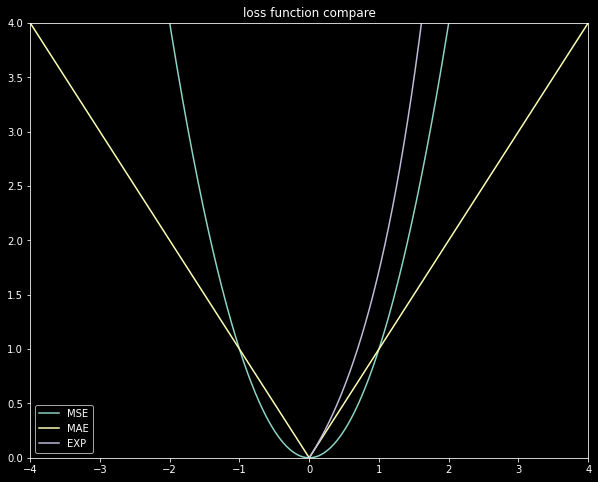

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

def SE(x,y,intc,beta):
    return (1./len(x))*(0.5)*sum(y - beta * x - intc)**2

def L1(intc,beta,lam):
    return lam*(np.abs(intc)+np.abs(beta))

def L2(intc,beta,lam):
    return lam*(intc**2 + beta**2)

def MAE(a):
    return np.abs(a)

def MSE(a):
    return a ** 2

N = 100
x = np.random.randn(N)
y = 2 * x + np.random.randn(N)

beta_N = 2000
beta = np.linspace(-5, 5, beta_N)

intc = 0.0

SE_array = np.array([MSE(i) for i in beta])
L1_array = np.array([MAE(i) for i in beta])
ex_array = np.array([np.exp(i)-1 for i in beta])
L2_array = np.array([L2(intc,i,lam=1) for i in beta])
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(beta,SE_array,label='MSE')
ax1.plot(beta,L1_array,label='MAE')
ax1.plot(beta,ex_array,label='EXP')
# ax1.plot(beta,L2_array,label='L2 norm')
plt.ylim(0, 4)
plt.xlim(-4, 4)
plt.title('loss function compare')
plt.legend()
fig1.show()


In [7]:
loss_file = open("./loss_log/gan_loss_L1_48_8e_2_1e_2", "r")
losses = loss_file.readlines()
pix_loss = []
pix_loss_w = []
fea_loss = []
gan_loss = []
gan_loss_w = []
total_loss = []
for i in losses:
    loss = i.split(',')
    pix_loss.append(float(loss[0]))
    pix_loss_w.append(float(loss[1]))
    fea_loss.append(float(loss[2]))
    gan_loss.append(float(loss[3]))
    gan_loss_w.append(float(loss[4]))
    total_loss.append(float(loss[5]))
loss_file.close()

In [8]:
x = [i+1 for i in range(len(pix_loss))]
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\2663207153.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


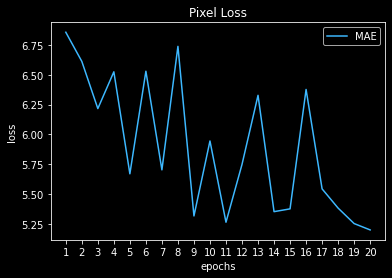

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,pix_loss,label='MAE', color='#3db8ff')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Pixel Loss')
plt.legend()
fig1.show()

C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\3470076117.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


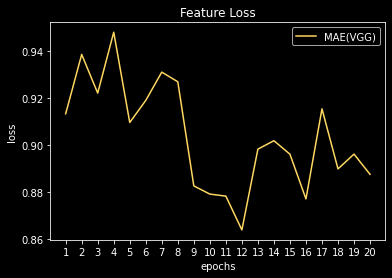

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,fea_loss,label='MAE(VGG)', color='#ffd862')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Feature Loss')
plt.legend()
fig1.show()

C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\3919529486.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


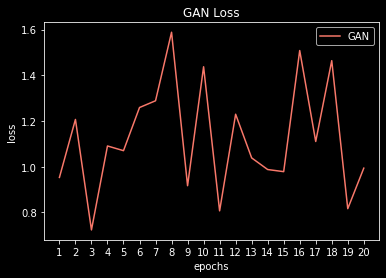

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,gan_loss,label='GAN', color='#f8786a')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('GAN Loss')
plt.legend()
fig1.show()

C:\Users\Yuan\AppData\Local\Temp\ipykernel_25388\1697734815.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


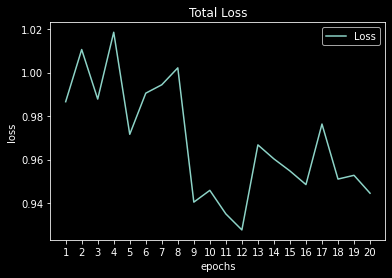

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,total_loss,label='Loss')
plt.xticks(x)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Total Loss')
plt.legend()
fig1.show()

In [2]:
import cv2
import numpy as np

In [35]:
im1_color = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im1.png").astype(np.float32)
im2_color = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im2.png").astype(np.float32)
im1 = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im1.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
im2 = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im2.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
im3 = cv2.imread("../dataset/vimeo90k/hr/00002/0025/im3.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
mv2 = np.load(f"../dataset/vimeo90k/lr/00002/0025/mv2.npy").astype('float')
multiple = 255

MAE_im1 = (np.mean(np.abs(im1*multiple-im2*multiple)) + np.mean(np.abs(im1*multiple-im3*multiple)))/3
MAE_im2 = (np.mean(np.abs(im2*multiple-im1*multiple)) + np.mean(np.abs(im2*multiple-im3*multiple)))/3
MAE_im3 = (np.mean(np.abs(im3*multiple-im1*multiple)) + np.mean(np.abs(im3*multiple-im2*multiple)))/3

MSE_im1 = (np.mean(np.power(im1*multiple-im2*multiple, 2)) + np.mean(np.power(im1*multiple-im3*multiple, 2)))/3
MSE_im2 = (np.mean(np.power(im2*multiple-im1*multiple, 2)) + np.mean(np.power(im2*multiple-im3*multiple, 2)))/3
MSE_im3 = (np.mean(np.power(im3*multiple-im1*multiple, 2)) + np.mean(np.power(im3*multiple-im2*multiple, 2)))/3

In [36]:
print(MAE_im1)
print(MAE_im2)
print(MAE_im3)
print(MSE_im1)
print(MSE_im2)
print(MSE_im3)

im1_2_diff = np.abs(im1*255-im2*255)
mv_weight = (np.abs(mv2[:,:,0]) + np.abs(mv2[:,:,1])) / 2

4.9208723704020185
3.525684038798014
4.325311660766602
348.93798828125
208.9573771158854
274.9145914713542


In [37]:
mv_weight = cv2.resize(mv_weight, (448, 256), interpolation=cv2.INTER_NEAREST)
print(np.max(mv2))

5.0


391.51883


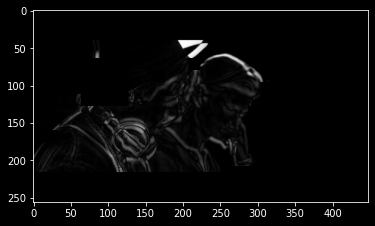

In [65]:
# plt.imshow(mv_weight, cmap='gray')
mv_weight = mv_weight.reshape((256,448))
mv_loss = np.abs((im1*255-im2*255))*(mv_weight>0)
print(np.mean(mv_loss**2))
plt.imshow((mv_loss), cmap="gray")

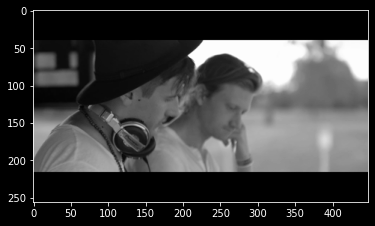

In [11]:
plt.imshow(im2, cmap='gray')


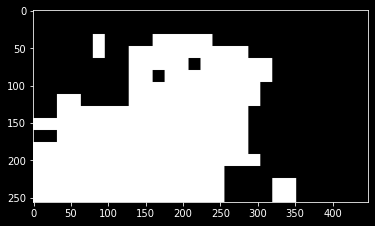

In [69]:
plt.imshow(mv_weight>0, cmap='gray')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


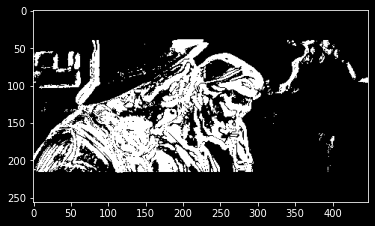

In [43]:
print(im1_2_diff)
plt.imshow((im1_2_diff>=5), cmap='gray')

In [24]:
plt.imshow(np.abs(im1[:,:,0]-im2[:,:,0]), cmap="gray", vmin=0, vmax=255)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

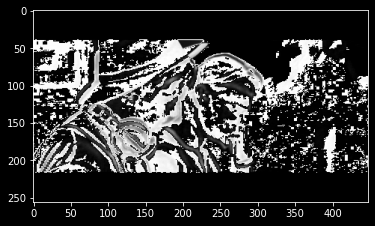

In [57]:
plt.imshow(np.abs(im2[:,:,0]-im1[:,:,0]), cmap="gray", vmin=0, vmax=255)

In [62]:
import scipy.stats as st
mu, sigma = 0, 1
s = st.norm(mu, sigma).rvs(10)

In [63]:
print(s.max())
print(s.min())

2.3108876101310067
-0.7147078934282931


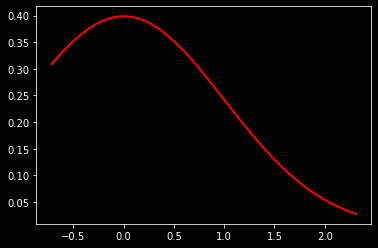

In [64]:
s_fit = np.linspace(s.min(), s.max())
plt.plot(s_fit, st.norm(0, 1).pdf(s_fit), lw=2, c='r')

In [61]:
st.norm(0, 1).pdf(s_fit)

array([1.82177133e-04, 3.25051612e-04, 5.66985903e-04, 9.66837912e-04,
       1.61174584e-03, 2.62664221e-03, 4.18472337e-03, 6.51769548e-03,
       9.92391078e-03, 1.47717895e-02, 2.14953661e-02, 3.05786323e-02,
       4.25258245e-02, 5.78161146e-02, 7.68433939e-02, 9.98448451e-02,
       1.26825398e-01, 1.57488299e-01, 1.91184125e-01, 2.26890774e-01,
       2.63234811e-01, 2.98559765e-01, 3.31040184e-01, 3.58832378e-01,
       3.80245434e-01, 3.93910780e-01, 3.98926788e-01, 3.94957176e-01,
       3.82268307e-01, 3.61699619e-01, 3.34571763e-01, 3.02546403e-01,
       2.67458360e-01, 2.31143580e-01, 1.95285037e-01, 1.61293764e-01,
       1.30234983e-01, 1.02801444e-01, 7.93290493e-02, 5.98448465e-02,
       4.41349603e-02, 3.18200016e-02, 2.24274104e-02, 1.54532396e-02,
       1.04092975e-02, 6.85464198e-03, 4.41275289e-03, 2.77712812e-03,
       1.70861296e-03, 1.02766828e-03])